In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import pandas as pd
import sys, os
sys.path.insert(0, "/home/gstupp/projects/WikidataIntegrator")
from wikidataintegrator import wdi_core, wdi_helpers
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [38]:
prop_df = pd.read_csv("prop_2_count.csv", index_col=0)
prop_df.fillna(0, inplace=True)
prop_df = prop_df.astype(int)
print(len(prop_df))
prop_df.head()

32891


,unique,total,organic,robotic,"robotic,organic",organic__total,robotic__total,"robotic,organic__total",-,Apache-HttpClient,Apache-Jena-ARQ,Asparagus/Asparagus 0.1,C++ WikiAPI,GuzzleHttp,Jakarta Commons-HttpClient/3.1,Java/1.7.0,Java/1.8.0,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),Magnus labs tools,MediaWiki/1.30.0-wmf.*,PBB_core fastrun,PetScan,Python-urllib,Pywikibot/3.0-dev,QueryBot/0.1,Ruby,WikidataR - https://github.com/Ironholds/WikidataR,YTCleaner,__find_genus,__match_taxon,awarder,axios,beaTunes,beacon,bot_commons,browser,coords2json,curl,https://github.com/bearloga/WikidataQueryServiceR,images_on_wikidata_not_wikipedia,jgonsior-tree,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),missing_wp_animal_audio,node-fetch/1.0 (+https://github.com/bitinn/node-fetch),okhttp/3.4.1,orcid_bot,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),other,python-requests,query,...,-__total,Apache-HttpClient__total,Apache-Jena-ARQ__total,Asparagus/Asparagus 0.1__total,C++ WikiAPI__total,GuzzleHttp__total,Jakarta Commons-HttpClient/3.1__total,Java/1.7.0__total,Java/1.8.0__total,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,Magnus labs tools__total,MediaWiki/1.30.0-wmf.*__total,PBB_core fastrun__total,PetScan__total,Python-urllib__total,Pywikibot/3.0-dev__total,QueryBot/0.1__total,Ruby__total,WikidataR - https://github.com/Ironholds/WikidataR__total,YTCleaner__total,__find_genus__total,__match_taxon__total,awarder__total,axios__total,beaTunes__total,beacon__total,bot_commons__total,browser__total,coords2json__total,curl__total,https://github.com/bearloga/WikidataQueryServiceR__total,images_on_wikidata_not_wikipedia__total,jgonsior-tree__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,missing_wp_animal_audio__total,node-fetch/1.0 (+https://github.com/bitinn/node-fetch)__total,okhttp/3.4.1__total,orcid_bot__total,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *)__total,other__total,python-requests__total,query__total,rest-client2.0.* (*) ruby/*__total,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,taxon_matcher__total,testing__total,thorough_name_match__total,update_dynamic__total,wd_edit_stats__total,wdq_image_feed__total
P698|P698,4853459,4878342,1,4853458,0,1,4878341,0,0,0,0,0,6,0,0,0,0,0,0,1839,4851613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0,0,1839,4851613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P279|P31,3244643,13385859,53390,3185556,5697,97424,12591766,696669,173619,1665,2905,0,1,0,53,347,23189,0,1935,0,86,444,10993,171437,105517,30760,0,0,0,0,1,0,22542,0,0,314420,0,331,63,0,0,17042,0,21100,0,0,196322,3905,508041,39,...,173619,1665,2905,0,1,0,53,347,23189,0,1935,0,86,444,10993,171437,105517,30760,0,0,0,0,1,0,22542,0,0,314420,0,331,63,0,0,17042,0,21100,0,0,196322,3905,508041,39,757,1638496,540,0,0,0,0,1
P932|P932,2212168,2218368,11,2212157,0,11,2218357,0,0,0,0,0,5,0,0,0,0,0,0,800,2211352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0,0,800,2211352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P1282|P1282,1176182,1940495,10,1176136,36,12,1940357,126,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,1176162,0,0,0,...,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0,0,0,1176162,0,0,0,0,0,0,0,0,0,0,0
P17|P625,888474,3230980,10385,877894,195,25783,3201524,3673,22016,4,2350,0,0,0,1973,778520,445,0,80,0,0,6,10,14,0,7,0,0,0,0,0,0,0,0,0,60896,0,0,3,0,0,1,0,0,0,0,0,267,5304,12,...,22016,4,2350,0,0,0,1973,778520,445,0,80,0,0,6,10,14,0,7,0,0,0,0,0,0,0,0,0,60896,0,0,3,0,0,1,0,0,0,0,0,267,5304,12,0,16764,0,0,0,0,0,0


In [39]:
prop_df['nonPBB'] = prop_df['unique'] - prop_df['PBB_core fastrun']
prop_df['nonPBB__total'] = prop_df['total'] - prop_df['PBB_core fastrun__total']

In [40]:
# columns I care about first
vc = ['unique', 'total', 'organic', 'organic__total', 'robotic', 'robotic__total',
      'PBB_core fastrun', 'PBB_core fastrun__total', 'nonPBB', 'nonPBB__total']
cols = list(set(prop_df.columns) - set(vc))
prop_df = prop_df[vc + cols]
prop_df.head()

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Apache-HttpClient,Ruby,curl,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),testing,other__total,okhttp/3.4.1__total,GuzzleHttp__total,images_on_wikidata_not_wikipedia,YTCleaner__total,awarder,Pywikibot/3.0-dev__total,wd_edit_stats,taxon_matcher,query__total,orcid_bot__total,rest-client2.0.* (*) ruby/*__total,__match_taxon,Python-urllib__total,bot_commons__total,__find_genus,curl__total,Java/1.7.0,beaTunes,Java/1.8.0,coords2json,Asparagus/Asparagus 0.1__total,missing_wp_animal_audio,jgonsior-tree,-,beaTunes__total,images_on_wikidata_not_wikipedia__total,PetScan,C++ WikiAPI,beacon,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),wd_edit_stats__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Java/1.7.0__total,GuzzleHttp,...,C++ WikiAPI__total,WikidataR - https://github.com/Ironholds/WikidataR,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),bot_commons,okhttp/3.4.1,jgonsior-tree__total,Apache-Jena-ARQ,sparqlwrapper * (rdflib.github.io/sparqlwrapper),__find_genus__total,update_dynamic__total,wdq_image_feed,QueryBot/0.1__total,Jakarta Commons-HttpClient/3.1,MediaWiki/1.30.0-wmf.*,"robotic,organic",YTCleaner,missing_wp_animal_audio__total,awarder__total,"robotic,organic__total",WikidataR - https://github.com/Ironholds/WikidataR__total,python-requests__total,query,Ruby__total,testing__total,https://github.com/bearloga/WikidataQueryServiceR,PetScan__total,Apache-Jena-ARQ__total,https://github.com/bearloga/WikidataQueryServiceR__total,browser,__match_taxon__total,update_dynamic,thorough_name_match,browser__total,python-requests,Java/1.8.0__total,Asparagus/Asparagus 0.1,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,rest-client2.0.* (*) ruby/*,axios__total,Python-urllib,coords2json__total,axios,taxon_matcher__total,wdq_image_feed__total,Magnus labs tools,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,orcid_bot,MediaWiki/1.30.0-wmf.*__total,Magnus labs tools__total,Apache-HttpClient__total
P698|P698,4853459,4878342,1,1,4853458,4878341,4851613,4851613,1846,26729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,0,1839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1839,0,0
P279|P31,3244643,13385859,53390,97424,3185556,12591766,86,86,3244557,13385773,1665,30760,331,17042,0,3905,0,0,0,0,1,171437,0,540,39,0,757,0,10993,0,0,331,347,22542,23189,0,0,0,0,173619,22542,0,444,1,0,0,0,17042,347,0,...,1,0,196322,0,0,0,2905,1638496,0,0,1,105517,53,0,5697,0,0,1,696669,0,508041,39,30760,0,63,444,2905,63,314420,0,0,0,314420,508041,23189,0,0,757,0,10993,0,0,540,1,1935,1638496,0,0,1935,1665
P932|P932,2212168,2218368,11,11,2212157,2218357,2211352,2211352,816,7016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800,0,0
P1282|P1282,1176182,1940495,10,12,1176136,1940357,0,0,1176182,1940495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,...,10,0,1176162,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,126,0,0,0,0,0,0,0,0,0,46,0,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P17|P625,888474,3230980,10385,25783,877894,3201524,0,0,888474,3230980,4,7,0,1,0,267,0,0,0,0,0,14,0,0,12,0,0,0,10,0,0,0,778520,0,445,0,0,0,0,22016,0,0,6,0,0,0,0,1,778520,0,...,0,0,0,0,0,0,2350,16764,0,0,0,0,1973,0,195,0,0,0,3673,0,5304,12,7,0,3,6,2350,3,60896,0,0,0,60896,5304,445,0,0,0,0,10,0,0,0,0,80,16764,0,0,80,4


In [17]:
query = """
SELECT ?prop ?propLabel WHERE {
?prop wikibase:propertyType ?pt .
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""
prop_label_df = wdi_core.WDItemEngine.execute_sparql_query(query, as_dataframe=True)
prop_label_df.prop = prop_label_df.prop.str.replace("http://www.wikidata.org/entity/", "")
prop_label = dict(zip(prop_label_df.prop, prop_label_df.propLabel))

In [41]:
# toss the ones in which its the same two props
print(len(prop_df))
prop_df = prop_df.iloc[prop_df.index.map(lambda x: len(set(x.split("|"))) == 2),:]
print(len(prop_df))

32891
30263


In [42]:
prop_df.index = prop_df.index.map(lambda x: "|".join(map(lambda y:prop_label.get(y,""), x.split("|"))))
prop_df = prop_df.iloc[prop_df.index.notnull(),:]
prop_df.head(5)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Apache-HttpClient,Ruby,curl,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),testing,other__total,okhttp/3.4.1__total,GuzzleHttp__total,images_on_wikidata_not_wikipedia,YTCleaner__total,awarder,Pywikibot/3.0-dev__total,wd_edit_stats,taxon_matcher,query__total,orcid_bot__total,rest-client2.0.* (*) ruby/*__total,__match_taxon,Python-urllib__total,bot_commons__total,__find_genus,curl__total,Java/1.7.0,beaTunes,Java/1.8.0,coords2json,Asparagus/Asparagus 0.1__total,missing_wp_animal_audio,jgonsior-tree,-,beaTunes__total,images_on_wikidata_not_wikipedia__total,PetScan,C++ WikiAPI,beacon,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),wd_edit_stats__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Java/1.7.0__total,GuzzleHttp,...,C++ WikiAPI__total,WikidataR - https://github.com/Ironholds/WikidataR,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),bot_commons,okhttp/3.4.1,jgonsior-tree__total,Apache-Jena-ARQ,sparqlwrapper * (rdflib.github.io/sparqlwrapper),__find_genus__total,update_dynamic__total,wdq_image_feed,QueryBot/0.1__total,Jakarta Commons-HttpClient/3.1,MediaWiki/1.30.0-wmf.*,"robotic,organic",YTCleaner,missing_wp_animal_audio__total,awarder__total,"robotic,organic__total",WikidataR - https://github.com/Ironholds/WikidataR__total,python-requests__total,query,Ruby__total,testing__total,https://github.com/bearloga/WikidataQueryServiceR,PetScan__total,Apache-Jena-ARQ__total,https://github.com/bearloga/WikidataQueryServiceR__total,browser,__match_taxon__total,update_dynamic,thorough_name_match,browser__total,python-requests,Java/1.8.0__total,Asparagus/Asparagus 0.1,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,rest-client2.0.* (*) ruby/*,axios__total,Python-urllib,coords2json__total,axios,taxon_matcher__total,wdq_image_feed__total,Magnus labs tools,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,orcid_bot,MediaWiki/1.30.0-wmf.*__total,Magnus labs tools__total,Apache-HttpClient__total
subclass of|instance of,3244643,13385859,53390,97424,3185556,12591766,86,86,3244557,13385773,1665,30760,331,17042,0,3905,0,0,0,0,1,171437,0,540,39,0,757,0,10993,0,0,331,347,22542,23189,0,0,0,0,173619,22542,0,444,1,0,0,0,17042,347,0,...,1,0,196322,0,0,0,2905,1638496,0,0,1,105517,53,0,5697,0,0,1,696669,0,508041,39,30760,0,63,444,2905,63,314420,0,0,0,314420,508041,23189,0,0,757,0,10993,0,0,540,1,1935,1638496,0,0,1935,1665
country|coordinate location,888474,3230980,10385,25783,877894,3201524,0,0,888474,3230980,4,7,0,1,0,267,0,0,0,0,0,14,0,0,12,0,0,0,10,0,0,0,778520,0,445,0,0,0,0,22016,0,0,6,0,0,0,0,1,778520,0,...,0,0,0,0,0,0,2350,16764,0,0,0,0,1973,0,195,0,0,0,3673,0,5304,12,7,0,3,6,2350,3,60896,0,0,0,60896,5304,445,0,0,0,0,10,0,0,0,0,80,16764,0,0,80,4
located in the administrative territorial entity|coordinate location,804925,2096781,15369,157930,789392,1934872,0,0,804925,2096781,0,6,6,1645,0,4,0,0,0,0,0,11,1,0,6,0,0,0,1820,0,0,6,778520,0,8,27,0,0,0,364,0,0,13,0,0,0,1,1645,778520,0,...,0,942,0,0,0,0,4,475,0,0,0,0,986,0,164,0,0,0,3979,942,62,6,6,0,2,13,4,2,18388,0,0,0,18388,62,8,0,0,0,0,1820,27,0,0,0,1804,475,0,0,1804,0
"dissolved, abolished or demolished|end time",790044,6690122,1159,1906,788871,6686557,0,0,790044,6690122,0,0,0,1013,0,0,0,0,0,0,0,6664,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1013,0,0,...,0,0,0,0,0,0,9,0,0,0,0,0,0,0,14,0,0,0,1659,0,781171,0,0,0,0,1,9,0,1173,0,0,0,1173,781171,1,0,0,0,0,0,0,0,0,0,27,0,0,0,27,0
image|instance of,788845,2338764,12305,74574,776416,2168619,0,0,788845,2338764,0,42610,3,2670,0,200,84,0,122257,0,0,6,1,0,295,0,0,0,11,0,0,3,0,0,498,0,0,0,0,517627,0,122257,23,12,0,0,1,2670,0,0,...,12,0,0,0,84,0,40,15467,0,1,1,0,0,0,124,0,0,0,95571,0,327,295,42610,0,2,23,40,2,86473,0,1,0,86473,327,498,0,0,0,0,11,0,0,0,1,366,15467,0,0,366,0


In [43]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


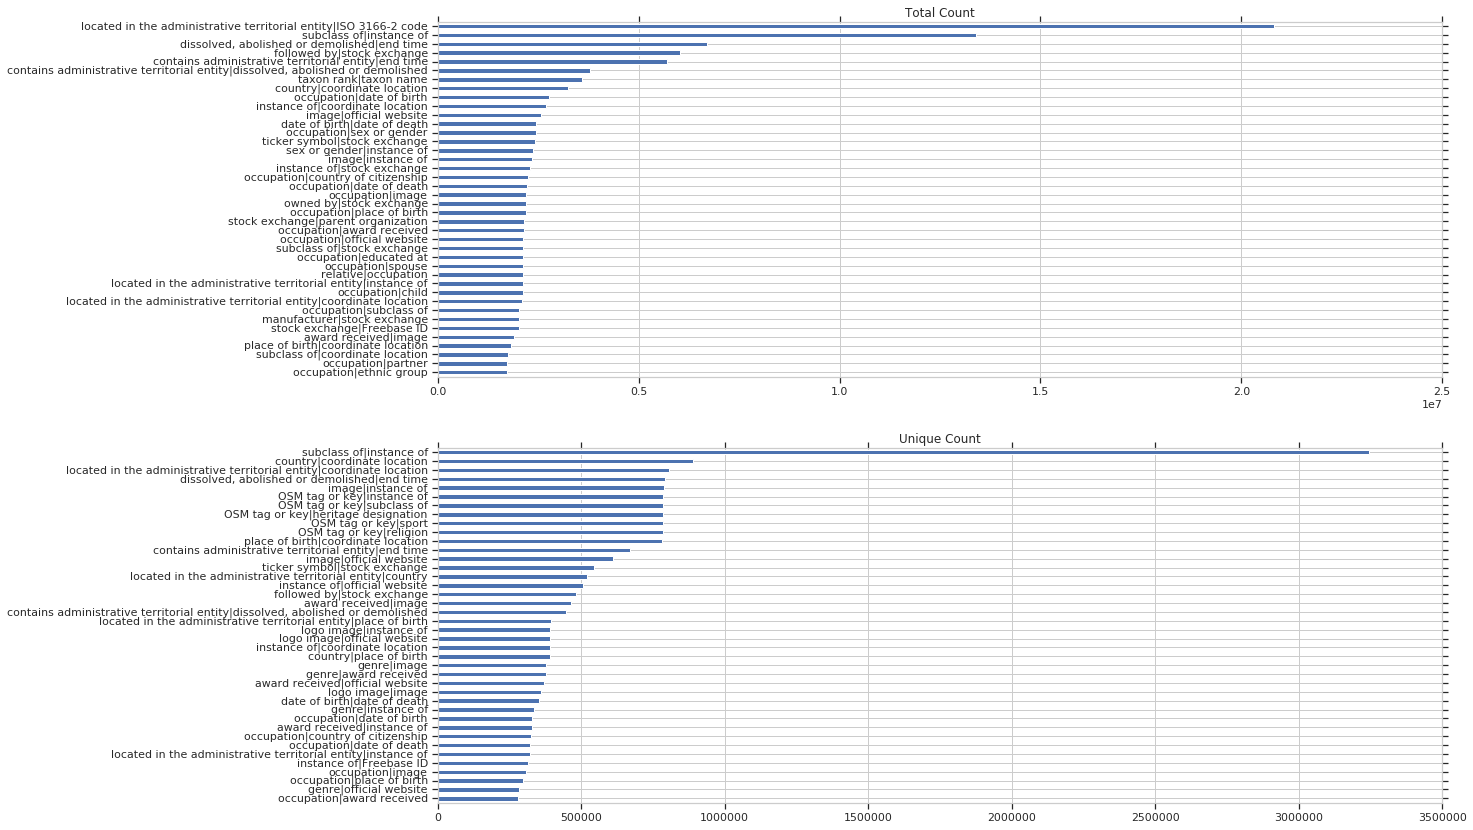

In [44]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = prop_df.sort_values("total")[-40:]
df[['total']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("unique")[-40:]
df[['unique']].plot.barh(ax=ax2, legend=False)
ax.set_title("Total Count")
ax2.set_title("Unique Count")

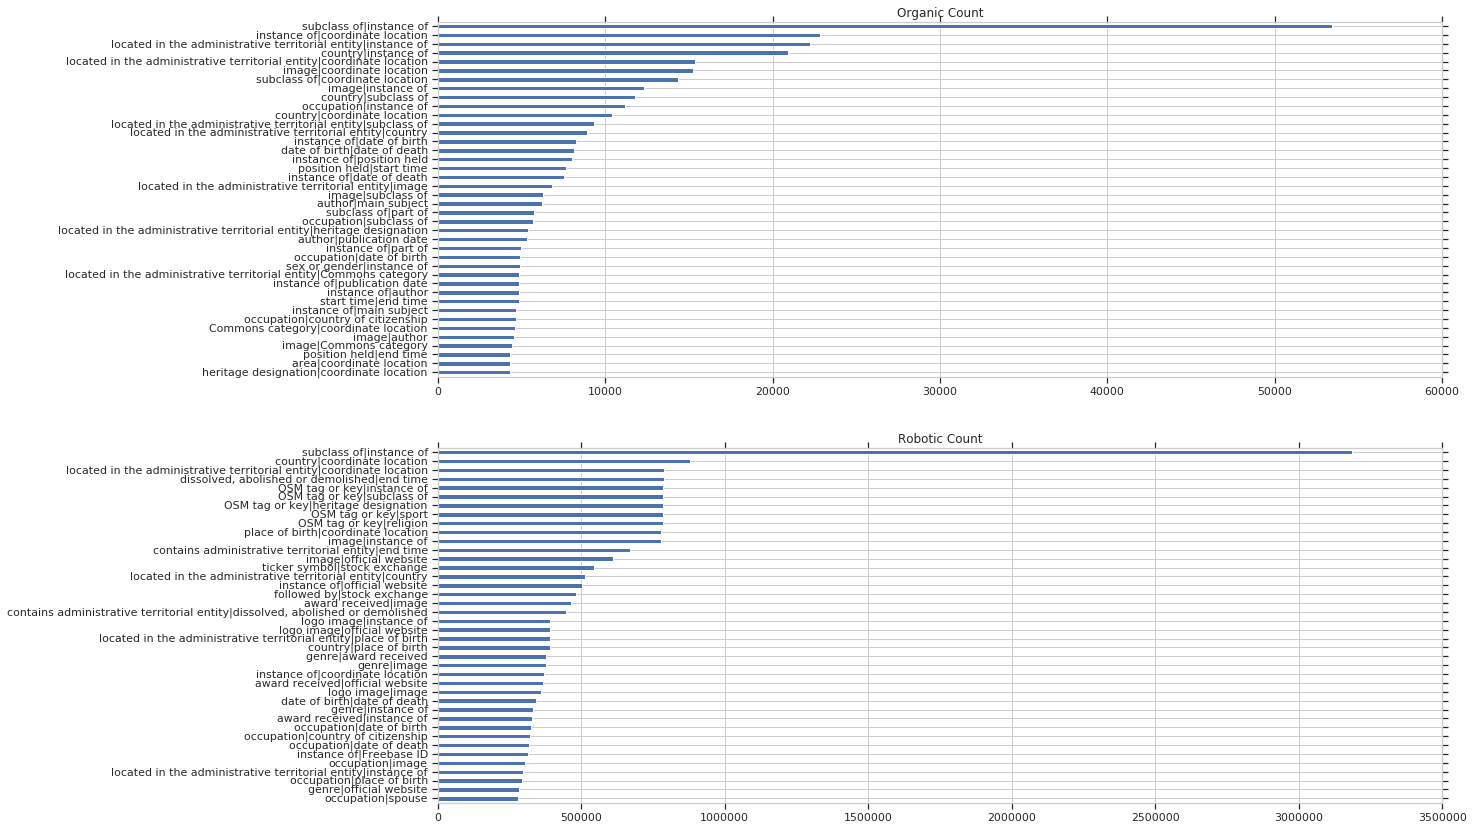

In [45]:
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(211)
df = prop_df.sort_values("organic")[-40:]
df[['organic']].plot.barh(ax=ax, legend=False)
ax2 = fig.add_subplot(212)
df = prop_df.sort_values("robotic")[-40:]
df[['robotic']].plot.barh(ax=ax2, legend=False)
ax.set_title("Organic Count")
ax2.set_title("Robotic Count")

In [48]:
# biomedical properties
PROPS = {'P685', 'P4196', 'P698', 'P659', 'P686', 'P702', 'P231', 'P4229', 'P1057', 'P3841', 'P1748', 'P932',  'P4271', 'P594', 'P1310', 'P813',
               'P2868', 'P639', 'P3357', 'P3870', 'P595', 'P234','P645', 'P3331', 'P5270', 'P356', 'P2249', 'P592', 'P3329', 'P274', 'P927', 'P688', 
              'P637', 'P652', 'P4168', 'P4317', 'P2926', 'P684', 'P225', 'P3359', 'P3358', 'P267', 'P1692', 'P233', 'P715', 'P2394', 'P3356', 'P2115', 'P492', 'P2548', 
              'P3860', 'P2871', 'P1065', 'P671', 'P636', 'P1550', 'P1640', 'P3354', 'P3094',  'P494', 'P352', 'P2646', 'P3986', 'P353', 'P2393', 'P2017', 'P2293', 
              'P780', 'P3406', 'P682', 'P1709', 'P661', 'P662', 'P486', 'P1395', 'P351', 'P235', 'P2870', 'P593', 'P2175', 'P354', 'P1554', 'P3355', 'P828', 'P644', 
              'P705', 'P704', 'P683', 'P638', 'P657', 'P591', 'P3853', 'P681', 'P3433', 'P703', 'P171', 'P493', 'P665', 'P3852', 'P699', 'P459', 'P2892', 'P672', 
              'P128', 'P680'}
PROPS = list(map(prop_label.get, PROPS))

In [50]:
bm_prop_df = prop_df.iloc[prop_df.index.map(lambda x: any([y in PROPS for y in x.split("|")])),:]
bm_prop_df = bm_prop_df.sort_values("browser", ascending=False).dropna(axis=0, how="all").dropna(axis=1, how="all").astype(int)
total = bm_prop_df.sum(axis=0)
cols = bm_prop_df.columns[total>1000]
bm_prop_df = bm_prop_df[cols]
bm_prop_df.head(20)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Apache-HttpClient,other__total,taxon_matcher,__match_taxon,Python-urllib__total,-,C++ WikiAPI,other,-__total,C++ WikiAPI__total,Apache-Jena-ARQ,sparqlwrapper * (rdflib.github.io/sparqlwrapper),"robotic,organic__total",Apache-Jena-ARQ__total,browser,__match_taxon__total,browser__total,Python-urllib,taxon_matcher__total,Magnus labs tools,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,Magnus labs tools__total,Apache-HttpClient__total
Entrez Gene ID|genomic start,1893,14545,1761,13285,116,576,88,88,1805,14457,0,0,0,0,0,0,0,0,0,0,0,44,684,0,1777,0,1777,0,0,0,44,0,0
physically interacts with|UniProt protein ID,1211,10725,1058,3483,153,7242,0,0,1211,10725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1211,0,1211,0,0,0,0,0,0
physically interacts with|found in taxon,1181,10643,1028,3401,153,7242,0,0,1181,10643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1181,0,1181,0,0,0,0,0,0
NCBI Locus tag|Entrez Gene ID,2881,11649,1117,7933,1756,3374,92,92,2789,11557,0,0,0,0,0,0,0,0,0,0,0,1672,342,0,1125,0,1125,0,0,0,1672,0,0
subclass of|Entrez Gene ID,1142,8347,1110,7915,23,80,9,9,1133,8338,0,1,0,0,0,0,0,1,0,0,0,22,352,0,1119,0,1119,0,0,0,22,0,0
strand orientation|Entrez Gene ID,1215,8766,1105,7906,102,518,88,88,1127,8678,0,0,0,0,0,0,0,0,0,0,0,22,342,0,1113,0,1113,0,0,0,22,0,0
Entrez Gene ID|genomic end,1192,8704,1082,7840,102,522,88,88,1104,8616,0,0,0,0,0,0,0,0,0,0,0,22,342,0,1090,0,1090,0,0,0,22,0,0
Entrez Gene ID|found in taxon,22852,212985,1054,6116,21784,206473,21769,21769,1083,191216,0,5,0,0,0,0,0,5,0,0,0,24,396,0,1068,0,1068,0,0,0,24,0,0
genomic start|genomic end,14260,39704,1020,9445,13228,29881,0,0,14260,39704,12700,0,0,0,0,0,0,0,0,0,496,44,378,496,1032,0,1032,0,0,0,44,0,12700
strand orientation|genomic start,1006,10177,962,9361,36,474,0,0,1006,10177,0,0,0,0,0,0,0,0,0,0,0,44,342,0,970,0,970,0,0,0,44,0,0


In [53]:
# DO queries
bm_prop_df = prop_df.iloc[prop_df.index.map(lambda x: any([y in list(map(prop_label.get, {'P699'})) for y in x.split("|")])),:]
bm_prop_df.head(20)

,unique,total,organic,organic__total,robotic,robotic__total,PBB_core fastrun,PBB_core fastrun__total,nonPBB,nonPBB__total,Apache-HttpClient,Ruby,curl,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps),testing,other__total,okhttp/3.4.1__total,GuzzleHttp__total,images_on_wikidata_not_wikipedia,YTCleaner__total,awarder,Pywikibot/3.0-dev__total,wd_edit_stats,taxon_matcher,query__total,orcid_bot__total,rest-client2.0.* (*) ruby/*__total,__match_taxon,Python-urllib__total,bot_commons__total,__find_genus,curl__total,Java/1.7.0,beaTunes,Java/1.8.0,coords2json,Asparagus/Asparagus 0.1__total,missing_wp_animal_audio,jgonsior-tree,-,beaTunes__total,images_on_wikidata_not_wikipedia__total,PetScan,C++ WikiAPI,beacon,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45),wd_edit_stats__total,kartotherian-geoshapes/0.0.10 (https://mediawiki.org/Maps)__total,Java/1.7.0__total,GuzzleHttp,...,C++ WikiAPI__total,WikidataR - https://github.com/Ironholds/WikidataR,osm-wikidata/0.1 (https://github.com/EdwardBetts/osm-wikidata; *),bot_commons,okhttp/3.4.1,jgonsior-tree__total,Apache-Jena-ARQ,sparqlwrapper * (rdflib.github.io/sparqlwrapper),__find_genus__total,update_dynamic__total,wdq_image_feed,QueryBot/0.1__total,Jakarta Commons-HttpClient/3.1,MediaWiki/1.30.0-wmf.*,"robotic,organic",YTCleaner,missing_wp_animal_audio__total,awarder__total,"robotic,organic__total",WikidataR - https://github.com/Ironholds/WikidataR__total,python-requests__total,query,Ruby__total,testing__total,https://github.com/bearloga/WikidataQueryServiceR,PetScan__total,Apache-Jena-ARQ__total,https://github.com/bearloga/WikidataQueryServiceR__total,browser,__match_taxon__total,update_dynamic,thorough_name_match,browser__total,python-requests,Java/1.8.0__total,Asparagus/Asparagus 0.1,Jersey/2.22.1 (HttpUrlConnection 1.8.0_45)__total,rest-client2.0.* (*) ruby/*,axios__total,Python-urllib,coords2json__total,axios,taxon_matcher__total,wdq_image_feed__total,Magnus labs tools,sparqlwrapper * (rdflib.github.io/sparqlwrapper)__total,orcid_bot,MediaWiki/1.30.0-wmf.*__total,Magnus labs tools__total,Apache-HttpClient__total
subclass of|Disease Ontology ID,36,465,25,67,9,365,10,10,26,455,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,33,0,0,0,0,0,0,0,0,0,27,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
instance of|Disease Ontology ID,27,392,18,27,9,365,8,8,19,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MeSH ID|Disease Ontology ID,22,382,18,18,4,364,4,4,18,378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Disease Ontology ID|Ensembl Transcript ID,20,260,0,0,20,260,0,0,20,260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Disease Ontology ID|Drugbank ID,20,260,0,0,20,260,0,0,20,260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Disease Ontology ID|Dodis ID,20,260,0,0,20,260,0,0,20,260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Disease Ontology ID|Ensembl Protein ID,20,260,0,0,20,260,0,0,20,260,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Neurolex ID|Disease Ontology ID,16,112,0,0,16,112,0,0,16,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,...,16,0,0,0,0,0,0,0

In [64]:
!zcat data/2017-678_uniq.tsv.gz| parallel --pipe --block 10M "python3 unquote.py | grep -P '<http://www.wikidata.org/[^>]*?P699>' | grep -P '<http://www.wikidata.org/[^>]*?P279>'"

SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  <http://www.wikidata.org/entity/Q5432932>  <http://www.wikidata.org/prop/direct/P279>  ?var1 .	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  <http://www.wikidata.org/entity/Q5432932>  <http://www.wikidata.org/prop/direct/P279>  ?var1 .	 SERVICE  <http://wikiba.se/ontology#label>   {	    <http://www.bigdata.com/rdf#serviceParam>  <http://wikiba.se/ontology#language>  "en".	  }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  ?var3  <http://www.wikidata.org/prop/direct/P279>  ?var1 .	 SERVICE  <http://wikiba.se/ontology#label>   {	    <http://www.bigdata.com/rdf#serviceParam>  <http://wikiba.se/ontology#language>  "en".	  }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/direct/P279>  ?var3 .	 }	}		ro

SELECT DISTINCT ?var1  ?var1Label  ?var2  ?var3  ?var4 	WHERE {	  VALUES (  ?var5  ) {	   (  "true"^^<http://www.w3.org/2001/XMLSchema#boolean>  )	   (  "false"^^<http://www.w3.org/2001/XMLSchema#boolean>  )	  }	  BIND (  IF (  ?var5 , ?var4 , ?var6  )  AS  ?var1 ).	  BIND (  IF (  ?var5 , ?var4Label , ?var6Label  )  AS  ?var1Label ).	  BIND (  IF (  ?var5 , "FFA500", "7FFF00" )  AS  ?var2 ).	  BIND (  IF (  ?var5 , "", ?var4  )  AS  ?var3 ).	  ?var4  <http://www.wikidata.org/prop/direct/P699>  ?var7 .	  ?var4  <http://www.wikidata.org/prop/direct/P279> + <http://www.wikidata.org/entity/Q18123741> .	  ?var4  <http://www.wikidata.org/prop/direct/P2176>  ?var6 .	  ?var6  <http://www.w3.org/2000/01/rdf-schema#label>  ?var6Label .	  ?var4  <http://www.w3.org/2000/01/rdf-schema#label>  ?var4Label .	 FILTER (  ( (  LANG (  ?var6Label  )  =  "en" ) ) 	) .	 FILTER (  ( (  LANG (  ?var4Label  )  =  "en" ) ) 	) .	  ?var4  <http://www.wikidata.org/prop/direct/P31>  <http://www.wikidata.org/entity

In [65]:
!zcat data/2017-678_uniq.tsv.gz| parallel --pipe --block 10M "python3 unquote.py | grep -P '<http://www.wikidata.org/[^>]*?P699>' | grep -P '<http://www.wikidata.org/[^>]*?P486>'"

SELECT *	WHERE {	  <http://www.wikidata.org/entity/P699>  <http://www.wikidata.org/prop/P486>  ?var1 .	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/direct/P486>  ?var4 .	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/direct/P486>  ?var4 .	 }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	  ?var3  <http://www.wikidata.org/prop/P486>  ?var4 .	 }	}		organic	browser	1	
SELECT *	WHERE {	  ?var1  <http://www.wikidata.org/prop/direct/P699>  ?var2 .	 OPTIONAL {	  ?var1  <http://www.wikidata.org/prop/P486>  ?var3 .	 }	}		organic	browser	1	
SELECT *	WHERE {	  BIND (  LANG (  ?va